In [1]:
import numpy as np
import matplotlib.pyplot as plt

from Algorithms.learn.utils import config

# 0. Plot setting

In [2]:
import seaborn as sb
import matplotlib

sb.set_style('whitegrid')

FONTSIZE = 10
matplotlib.rcParams["figure.figsize"] = (10, 5)
matplotlib.rcParams["figure.dpi"] = 100
matplotlib.rcParams["figure.titlesize"] = FONTSIZE
matplotlib.rcParams["legend.fontsize"] = FONTSIZE
matplotlib.rcParams["xtick.labelsize"] = FONTSIZE
matplotlib.rcParams["ytick.labelsize"] = FONTSIZE
matplotlib.rcParams["axes.labelsize"] = FONTSIZE
matplotlib.rcParams["axes.titlesize"] = FONTSIZE
matplotlib.rcParams["savefig.bbox"] = "tight"
matplotlib.rcParams["savefig.pad_inches"] = 0.1
matplotlib.rcParams["lines.linewidth"] = 2
matplotlib.rcParams["axes.linewidth"] = 1.6

# 1. Model Setting

## 1.1 Load Config

In [3]:
env_kwargs, model_kwargs, learn_kwargs = config.load_config('tmp_config.yaml')

env 'BSMarket was created!
env 'BSMarket was created!


In [4]:
env_kwargs

{'cost': 0.02,
 'dividend': 0.0,
 'drift': 0.0,
 'freq': 1,
 'gen_name': 'gbm',
 'init_price': 1.0,
 'n_assets': 1000,
 'n_periods': 30,
 'payoff': 'european',
 'period_unit': 365,
 'reward_mode': 'pnl',
 'risk_free_interest': 0.0,
 'strike': 1.0,
 'volatility': 0.2}

In [5]:
model_kwargs

{'action_noise': NormalActionNoise(mu=0.0, sigma=0.1),
 'batch_size': 10,
 'buffer_size': 100,
 'create_eval_env': False,
 'device': 'auto',
 'env': <Env.env.BSMarket at 0x1d1083ff370>,
 'gamma': 0.99,
 'gradient_steps': -1,
 'learning_rate': <function Algorithms.learn.utils.config.lr_schedule(left: float)>,
 'learning_starts': 100,
 'optimize_memory_usage': False,
 'policy': Algorithms.policies.DoubleTD3Policy,
 'policy_kwargs': {'activation_fn': torch.nn.modules.activation.ReLU,
  'features_extractor_class': Env.feature_extractor.BatchNormExtractor,
  'features_extractor_kwargs': {'activation_fn': torch.nn.modules.activation.ReLU,
   'features_in': 4,
   'features_out': 2,
   'net_arch': [32, 64]},
  'n_critics': 1,
  'net_arch': [],
  'normalize_images': False,
  'optimizer_class': torch.optim.adam.Adam,
  'optimizer_kwargs': None,
  'share_features_extractor': True},
 'replay_buffer_class': None,
 'replay_buffer_kwargs': None,
 'seed': 42,
 'tau': 0.005,
 'tensorboard_log': 'logs/t

In [21]:
learn_kwargs

{'callback': <Algorithms.learn.utils.callbacks.ReportCallbacks at 0x1d13f84de80>,
 'eval_env': <Env.env.BSMarket at 0x1d20c7e47c0>,
 'eval_freq': 30,
 'eval_log_path': 'logs/tb_logs/ddpg_220523-1136_1',
 'log_interval': 30,
 'n_eval_episodes': 1,
 'reset_num_timesteps': True,
 'tb_log_name': 'ddpg_220523-1136',
 'total_timesteps': 500}

In [20]:
config.reconstruct_config(env_kwargs, model_kwargs, learn_kwargs)

env 'BSMarket was created!
model_kwargs['env']: <BSMarket instance>
env 'BSMarket was created!
learn_kwargs['eval_env']: <BSMarket instance>
learn_kwargs['tb_log_name']: ddpg_220523-1136
learn_kwargs['eval_log_path']: logs/tb_logs/ddpg_220523-1136_1


## 1.2 Construct env, model

In [22]:
from Algorithms import DDPG

model = DDPG(**model_kwargs)

Using cuda device
Wrapping the env with a `Monitor` wrapper
Wrapping the env in a DummyVecEnv.


## 1.3 Before Learning Plot

In [23]:
env = model_kwargs['env']
total_pnl = env.pnl_eval(model)

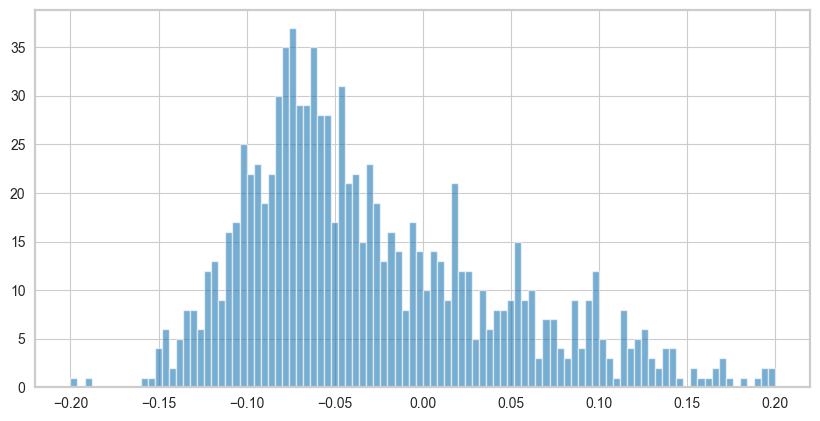

In [24]:
plt.hist(total_pnl, bins=100, range=(-0.2, 0.2), alpha=0.6)
plt.show()

# 2. Learning

In [25]:
model = model.learn(**learn_kwargs)

Wrapping the env with a `Monitor` wrapper
Wrapping the env in a DummyVecEnv.
Logging to logs/tb_logs\ddpg_220523-1136_1
[Training Start]
Eval num_timesteps=30, episode_reward=-0.68 +/- 0.00
Episode length: 30.00 +/- 0.00
---------------------------------
| eval/              |          |
|    mean_ep_length  | 30       |
|    mean_reward     | -0.678   |
| time/              |          |
|    total timesteps | 30       |
---------------------------------
New best mean reward!
Eval num_timesteps=60, episode_reward=-0.68 +/- 0.00
Episode length: 30.00 +/- 0.00
---------------------------------
| eval/              |          |
|    mean_ep_length  | 30       |
|    mean_reward     | -0.684   |
| time/              |          |
|    total timesteps | 60       |
---------------------------------
Eval num_timesteps=90, episode_reward=-0.69 +/- 0.00
Episode length: 30.00 +/- 0.00
---------------------------------
| eval/              |          |
|    mean_ep_length  | 30       |
|    mean_r

# 3. P&L Evaluation

## 3.1 After Learning

In [26]:
total_pnl = env.pnl_eval(model)

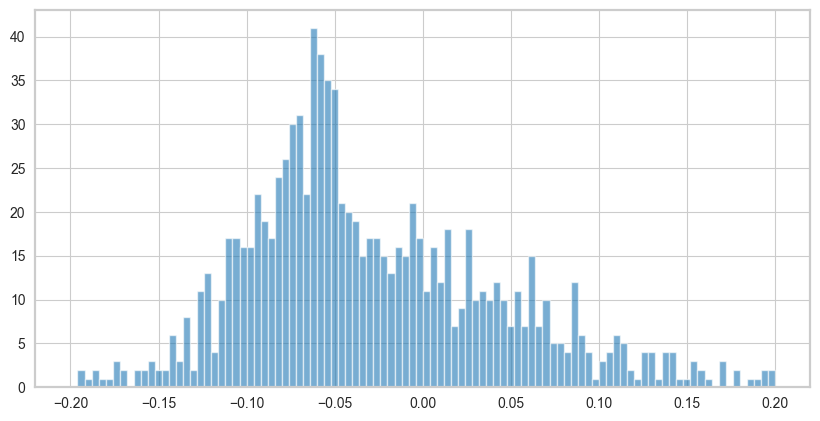

In [27]:
plt.hist(total_pnl, bins=100, range=(-0.2, 0.2), alpha=0.6)
plt.show()

# 4. Learning Config Saving

In [32]:
config.save_config(f'{learn_kwargs["eval_log_path"]}/config.yaml', env_kwargs, model_kwargs, learn_kwargs)

AttributeError: 'str' object has no attribute '__name__'